In [12]:
#on importe le modules qui nous permettent de gerer les repertoire
import os,shutil 
#repertoire contenant toutes les images
original_dir='/Users/yvank/Downloads/image/train'
#on creer un repertoire qui va contenir   les repertoires  d'entrainement de test et de validation
cat_vs_dog='/Users/Yvank/Downloads/cat_vs_dog'
os.mkdir(cat_vs_dog)
#on creer un repertoire pour les les donnees d'entrainements 
train_dir=os.path.join(cat_vs_dog,'train')
os.mkdir(train_dir)
#on creer un repertoire pour les donnes de test
test_dir=os.path.join(cat_vs_dog,'test')
os.mkdir(test_dir)
#on creer un repertoire pour les donnes de validation
val_dir=os.path.join(cat_vs_dog,'validation')
os.mkdir(val_dir)

In [13]:
#on creer une fonction qui va  recuperer un nombre de photos situé dans un intervalle [debut, fin]
#  et dispose les photos de chiens et chats dans le repertoire choisir   
def distribution(repertoire,debut,fin):

    for category in ("cat","dog"):
        annuaire=os.path.join(repertoire,category)
        os.mkdir(annuaire)
        images=[f"{category}.{i}.jpg" for i in  range(debut,fin)]
        for image in images:
            #on copie l'image
            shutil.copy(os.path.join(original_dir,image),annuaire)
#on affecte donc cette operation pour chacun de nos repertoire
distribution(train_dir,0,8000)
distribution(val_dir,8000,10000)
distribution(test_dir,10000,12500)


In [15]:
#on creer notre reseaux 
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [18]:
#on configure notre model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
#on recupere nos images et on les normalises
from keras.preprocessing.image import ImageDataGenerator
#on creer nos generateur d'image et on normalise l'image generer
train_gen=ImageDataGenerator(rescale=1./255)
test_gen=ImageDataGenerator(rescale=1./255)
val_gen=ImageDataGenerator(rescale=1./255)
#recuperons nos images dans nos differents repertoire 
train_data=train_gen.flow_from_directory(train_dir,target_size=(150,150),class_mode='binary',batch_size=32)
test_data=test_gen.flow_from_directory(test_dir,target_size=(150,150),class_mode='binary',batch_size=32)
val_data=val_gen.flow_from_directory(val_dir,target_size=(150,150),class_mode='binary',batch_size=32)


Found 16000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


0.0


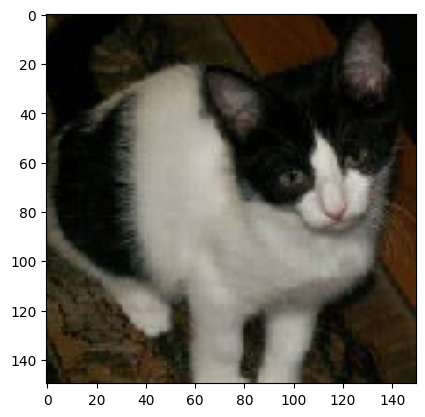

In [22]:
#affichons une image et reagrdons a quel nombre  respectivementcorrespond un chat et un chien
import matplotlib.pyplot as plt 
for a,b in train_data:
    plt.imshow(a[0])
    print(b[0])
    break

In [23]:
#entrainons notre model
history=model.fit(train_data,epochs=20,validation_data=val_data)

Epoch 1/20
500/500 [==============================] - 219s 436ms/step - loss: 0.6552 - accuracy: 0.6168 - val_loss: 0.5467 - val_accuracy: 0.7290
Epoch 2/20
500/500 [==============================] - 130s 260ms/step - loss: 0.5078 - accuracy: 0.7546 - val_loss: 0.4513 - val_accuracy: 0.8048
Epoch 3/20
500/500 [==============================] - 128s 256ms/step - loss: 0.4208 - accuracy: 0.8098 - val_loss: 0.3908 - val_accuracy: 0.8285
Epoch 4/20
500/500 [==============================] - 130s 259ms/step - loss: 0.3530 - accuracy: 0.8457 - val_loss: 0.4755 - val_accuracy: 0.7847
Epoch 5/20
500/500 [==============================] - 141s 282ms/step - loss: 0.3031 - accuracy: 0.8728 - val_loss: 0.3355 - val_accuracy: 0.8530
Epoch 6/20
500/500 [==============================] - 156s 311ms/step - loss: 0.2523 - accuracy: 0.8988 - val_loss: 0.3474 - val_accuracy: 0.8568
Epoch 7/20
500/500 [==============================] - 129s 258ms/step - loss: 0.2127 - accuracy: 0.9149 - val_loss: 0.3591 -

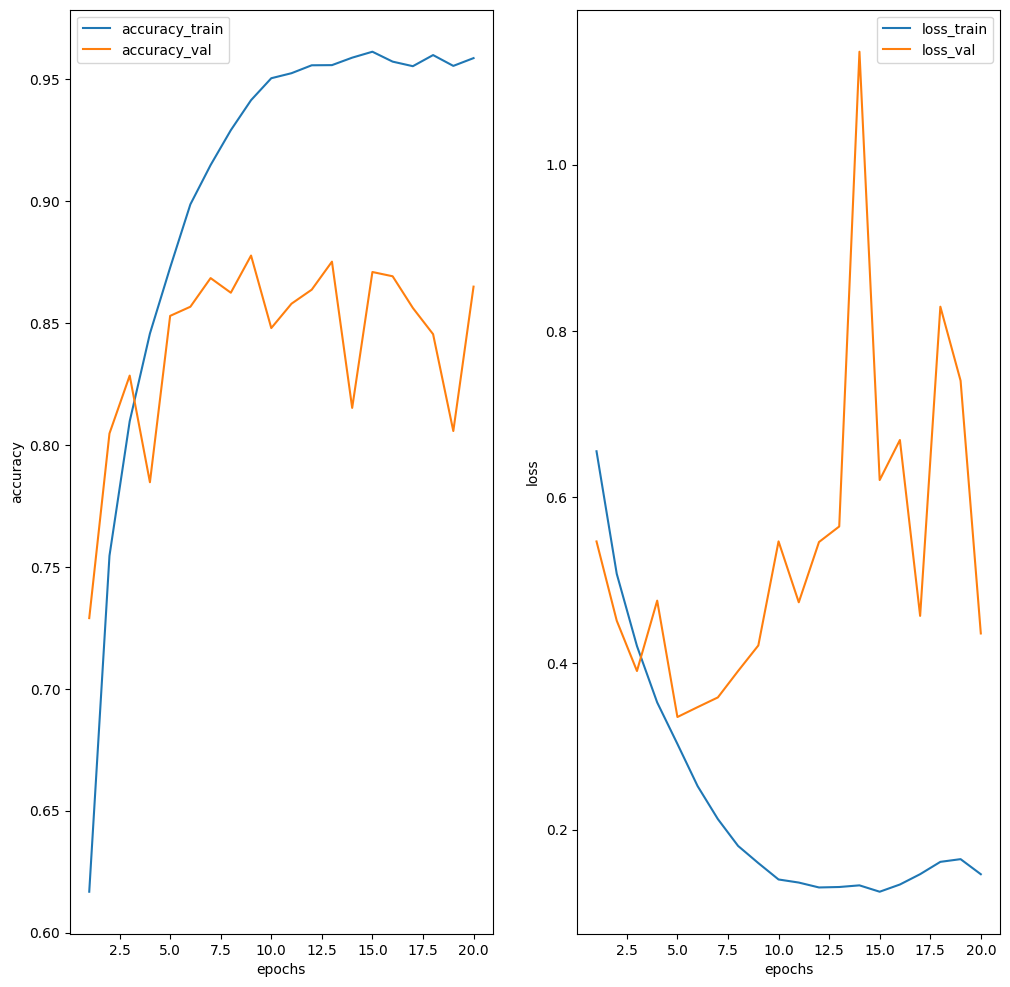

In [24]:
#affichons les courbes de precision et de perte sur les donnees d'entrainement et de validation
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(accuracy)+1)
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
"courbe de precision"
plt.plot(epochs,accuracy,label='accuracy_train')
plt.plot(epochs,val_accuracy,label='accuracy_val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(1,2,2)
#courbe de perte
plt.plot(epochs,loss,label='loss_train')
plt.plot(epochs,val_loss,label='loss_val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()




1/1 [==============================] - 0s 62ms/step


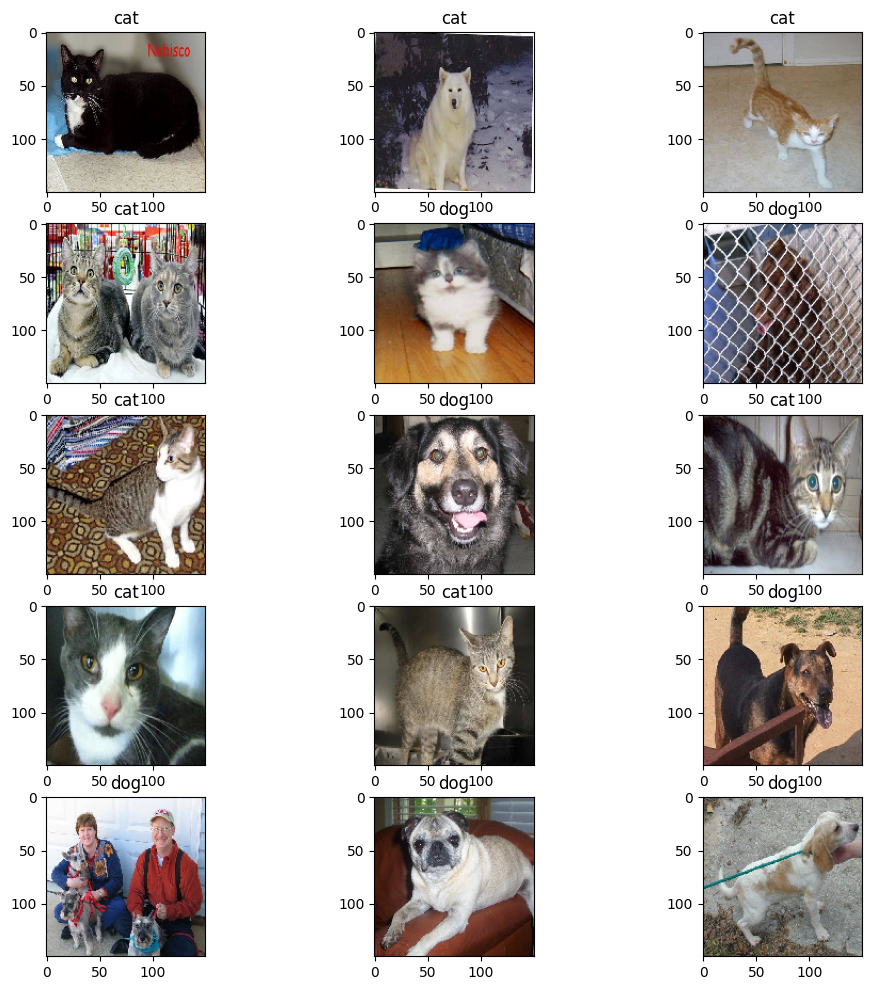

In [40]:
#on teste notre model et on affiche quelques predictions sur nos images 
import numpy as np
plt.figure(figsize=(12, 12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for x,y in test_data:
        prediction=model.predict(x)
        plt.title('cat' if prediction[0]<0.5 else 'dog')
        plt.imshow(x[0]) 
        break

